## Demo for distribution visualization using PP plot and QQ plot

Lets consider the following observations.
$X=[1.4, 0.5, 6.53, 12.34, 4.23]$

Lets check if these observations come from exponential distribution with $\lambda=5$.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

lmbda  = 5
N = 1000

observations = expon.rvs(scale=1/lmbda, size = N)

Lets sort these observations and find emprical cdf values.

For this purpose:
- sort observations
- cdf is computed as $(i-0.5)/N$ (0.5 is subtracted as Yates correction when a continous distribution is used to approximate a discrete distribution - We will talk about this later in the course!)

| Index | Observations  | Empr. cdf |
|-------|:-------------:|-----------|
|   1   |           |           |
|   2   |           |           |
|   3   |          |           |
|   4   |        |           |
|   5   |        |           |

In [43]:
observations = sorted(observations)

# 0.5 is added as indices start with 0
empr_cdf = [(i+0.5)/N for i in range(N)]

# print(f"observations: {observations} \nemprical cdf: {empr_cdf}")

Now we are going to compare:
- Emprical cdf against theoretical cdf for PP-plot
- Observations against theoretical quartiles for QQ-plot

As the observations are compared against exponential distribution, its theoretical cdf is computed as $F(x)=1-\exp\{-\lambda x\}$

In this example, $\lambda=5$ is used.

| Index | Observations  | Theoretical. cdf |
|-------|:-------------:|-----------|
|   1   |           |           |
|   2   |          |           |
|   3   |         |           |
|   4   |          |           |
|   5   |        |           |

In [44]:
# 0.5 is added as indices start with 0
theo_cdf = [1-np.exp(-lmbda* i) for i in observations]

# print(f"observations: {observations} \ntheoretical cdf: {theo_cdf}")

Once theoretical cdf values are computed, related quartile values are computed using inverse cdf.

For exponential distribution inverse cdf is $F^{-1}(x)=\frac{1}{\lambda}ln(1-x)$

| Index | Observations  | Emprical cdf |Theoretical. cdf |Theoretical quartile|
|-------|:-------------:|-----------|-------------|----------|
|   1   |           |           |||
|   2   |           |           |||
|   3   |          |           |||
|   4   |          |           |||
|   5   |         |           |||

In [45]:
# .0001 is added to avoid taking logarithm of zero
theo_quartile = [-1/lmbda*np.log(1-i) for i in theo_cdf]

#print(f"observations: {observations} \ntheoretical cdf: {theo_cdf} \
#    \ntheoretical quartiles: {theo_quartile}")

For PP-plot, plot emprical cdf against theoretical cdf

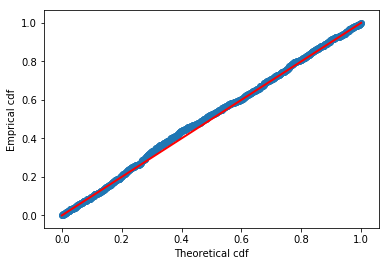

In [52]:
plt.scatter(empr_cdf, theo_cdf)

# draw line
x = np.arange(0,1.1,0.1)
plt.plot(x, x, color='red',linewidth=2)
plt.xlabel('Theoretical cdf')
plt.ylabel('Emprical cdf');

For QQ-plot, plot observations against theoretical quartiles 

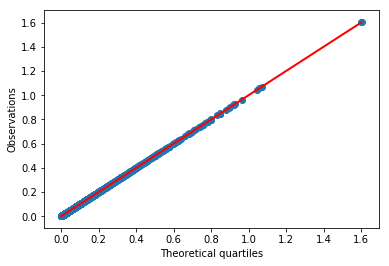

In [53]:
plt.scatter(observations, theo_quartile)

# draw line
x = np.arange(0,1.61,0.1)
plt.plot(x, x, color='red',linewidth=2)
plt.xlabel('Theoretical quartiles')
plt.ylabel('Observations');